# Apropiación del Notebook de Cynthia Villagra

## Ejercicio Espacios de Color

Usando una imagen a color de su elección: 

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [27.2 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,066 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [357 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [18.8 kB]
Fetched 8,629 kB in 1s (6,061 kB/s)




The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libllvm11 libpciaccess0 libsensors-config libsensors5 libvul

In [2]:
#instalo las librerias necesarias

import numpy as np #para trabajar con arrays
import cv2 #para procesar imagenes
from cv2 import imread #para convertir archivos en matrices
import matplotlib.pyplot as plt #para ver las img con matplotlib

In [3]:
#descargo la imagen de internet
!wget https://i.pinimg.com/736x/17/06/90/1706905258037ebb82412906c499c714.jpg

--2025-04-18 20:40:25--  https://i.pinimg.com/736x/17/06/90/1706905258037ebb82412906c499c714.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.64.84, 151.101.128.84, 151.101.192.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.64.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83011 (81K) [image/jpeg]
Saving to: ‘1706905258037ebb82412906c499c714.jpg.3’

1706905258037ebb824 100%[===================>]  81.07K  --.-KB/s    in 0.004s  

2025-04-18 20:40:25 (19.8 MB/s) - ‘1706905258037ebb82412906c499c714.jpg.3’ saved [83011/83011]



### Usa PIL para la extensión del archivo y modalidad del color RGB o BGR

In [4]:
from PIL import Image

img = Image.open("taza.jpg")
print("Formato de archivo original:", img.format)  # Ej: 'JPEG'
print("Modo de color:", img.mode)         # Ej: 'RGB'


Formato de archivo original: JPEG
Modo de color: RGB


### Carga la imagen con OpenCV que la levanta en BGR

In [5]:
#leo la imagen
imagen = imread("taza.jpg")


### Hace un SHAPE, visualiza el alto, el ancho y la cantidad de canales de color

In [6]:
imagen.shape

(1104, 736, 3)

### Con OpenCV convierte la imagen a RGB y la muestra con Matplotlib

En DeepNote puedo mostrar la imagen con Matplotlib, con OpenCv no se visualiza.

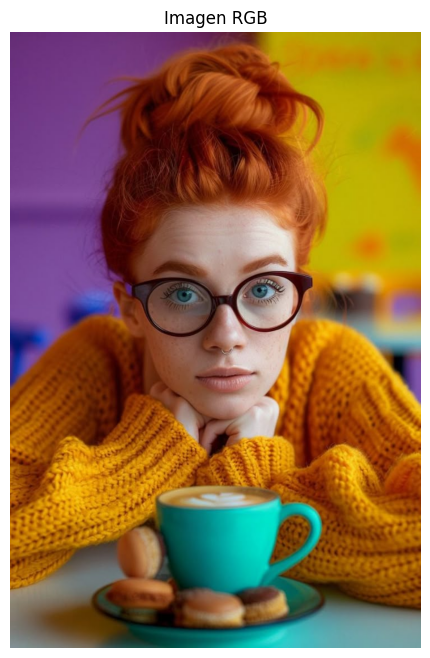

In [7]:
# OpenCV usa BGR, así que convertimos a RGB para mostrar correctamente
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)# convertimos a RGB
plt.figure(figsize=(10, 8)) # Tamanio de la imagen alto x ancho
plt.imshow(imagen_rgb) # Mostrar la imagen con Matplotlib
plt.title("Imagen RGB") # Titulo
plt.axis('off')  # Para ocultar los ejes
plt.show() # Mostrar la imagen

### Separa el canal Azul y se visualiza en escala de grises

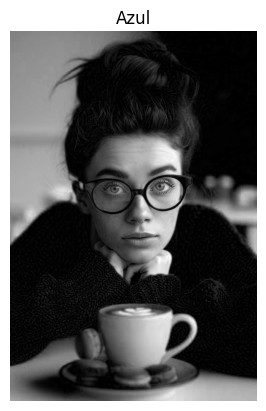

In [8]:
# separar canal azul (canal B)
canal_azul = imagen[:,:,0] # los dos puntos significa todas las filas o columnas.
plt.imshow(canal_azul, cmap='gray')  # usando cmap='gray' para mostrar en escala de grises
plt.title("Azul")
plt.axis('off')
plt.show()

### Separa el canal Verde y se visualiza en escala de grises

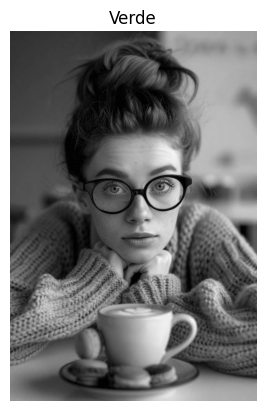

In [9]:
#separar canal verde (canal G)
canal_verde=imagen[:,:,1] # los dos puntos significa todas.
plt.imshow(canal_verde, cmap='gray')  # usando cmap='gray' para mostrar en escala de grises
plt.title("Verde")
plt.axis('off')
plt.show()

### Separa el canal Rojo y se visualiza en escala de grises

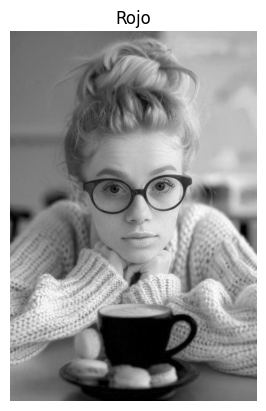

In [10]:
#separar canal rojo (canal_R)
canal_rojo=imagen[:,:,2] # los dos puntos significa todas.
plt.imshow(canal_rojo, cmap='gray')  # usando cmap='gray' para mostrar en escala de grises
plt.title("Rojo")
plt.axis('off')
plt.show()

### Comparación de los 3 canales en escala de grises

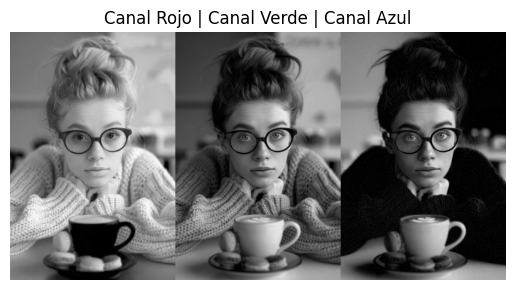

In [11]:
# Apilar horizontalmente solo los arrays
canales_juntos = np.hstack([canal_rojo, canal_verde, canal_azul])

# Mostrar con matplotlib en escala de grises
plt.imshow(canales_juntos, cmap='gray')
plt.title("Canal Rojo | Canal Verde | Canal Azul")
plt.axis('off')
plt.show()

En el canal rojo, se ve mucho negro en el iris, eso significa que ahi no hay nada de rojo en ese sector
La piel se ve bastante blanca, asumimos que hay mucho rojo en piel
En el canal verde hay pocos sectores que se ven negro, podemos deducir que hay gran cantidad de verde
En el canal azul podemos ver sectores blancos en el iris del ojo, lo que es correcto si comparamos con la imagen real

##b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

### Realiza un promedio de mínimos y máximos por canal

In [12]:
#Promedio
amin=canal_azul.min()
amax=canal_azul.max()
promedioazul=(amin+amax)/2
vmin=canal_verde.min()
vmax=canal_verde.max()
promedioverde=(vmin+vmax)/2
rmin=canal_rojo.min()
rmax=canal_rojo.max()
promediorojo=(rmin+rmax)/2
print("Promedio de azul:"+str(promedioazul))
print("Promedio de verde:"+str(promedioverde))
print("Promedio de rojo:"+str(promediorojo))

Promedio de azul:117.0
Promedio de verde:122.5
Promedio de rojo:127.5


Lo que había que hacer era el promedio entre TODOS los valores de ese canal
Primero, agarrar un canal, detectar el minimo y luego el maximo.
Luego hacer un promedio de todos los numeros entre el minimo y maximo para eso existe la funcion MEAN, para hacer promedio

### Utiliza la función MEAN para calcular el promedio de cada canal 

In [13]:
promazul = canal_azul.mean()
promrojo = canal_rojo.mean()
promverde = canal_verde.mean()

print("Promedio de azul: " + str(promazul))
print("Promedio de verde: " + str(promverde))
print("Promedio de rojo: " + str(promrojo))

# Verificar cuál canal tiene mayor promedio
if promrojo > promverde and promrojo > promazul:
    print("")
    print("El canal con mayor información es el rojo")
elif promverde > promazul:
    print("El canal con mayor información es el verde")
else:
    print("El canal con mayor información es el azul")


Promedio de azul: 55.6658371731254
Promedio de verde: 95.15805297928482
Promedio de rojo: 136.2372216150756

El canal con mayor información es el rojo


##c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

### Muestra la imagen en BGR convertida con OpenCV

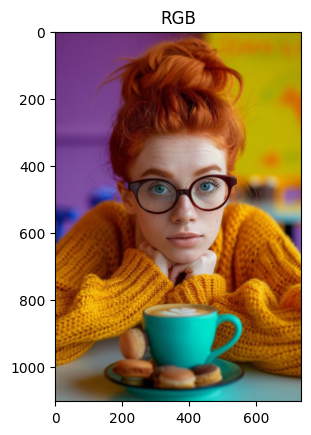

In [14]:
#muestro la imagen (BGR) con imshow de OPENCV
imagen_bgr = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_bgr)  
plt.title("RGB")
plt.axis('on') # muestra los ejes
plt.show()

### Muestra la imagen en BGR con Matplotlib

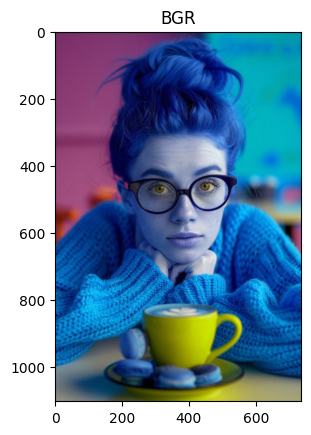

In [15]:
#muestro la imagen con imshow de Matplotlib
plt.imshow(imagen)  
plt.title("BGR")
plt.axis('on') # muestra los ejes 
plt.show()

### Elección del pixel de referencia

Decidí que quiero segmentar la taza, por lo que guiándome con los ejes elijo mas o menos un pixel del centro de del objeto. La taza.

In [16]:
imagen[950,400] #aca le digo que agarre el pixel de la columna 400, fila 950 
#(importante que se empieza a contar desde arriba)

array([169, 176,   1], dtype=uint8)

Lo que devuelve OpenCV es un array que dice la intensidad de cada color que por defecto sale en orden BGR: AZUL, VERDE, ROJO, es decir:
azul = 169
verde = 176
rojo= 1 

Quedaria este color estilo verde limón: https://g.co/kgs/vkQSBfw


En matplotlib espera que le digamos los 3 colores en este orden: ROJO, VERDE, AZUL
si no invertimos el orden, matplotlib va a entender esto:
rojo=99 
verde=176
azul=169
Quedaría este color mint o verde agua: https://g.co/kgs/JHsx1f3


CONCLUSION: el array que viene de OpenCV hay que darlo vuelta antes de pasarselo a Matplotlib para que se vean los colores reales

### Reconversión de BGR a RGB

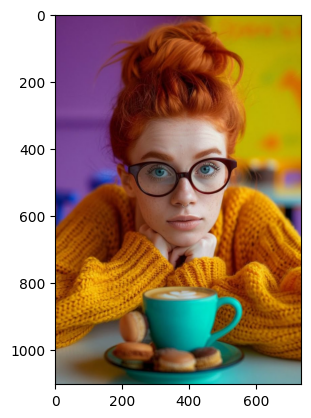

In [17]:
#Dar vuelta el orden (de BGR a RGB)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#ahora si, le pasamos a matplotlib la imagen en rgb, se van a ver los colores reales
plt.imshow(imagen_rgb)

## Ejercicio 2: Muestreo y Cuantización

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8

### Hace un SHAPE de la imagen elegida para tamaño y canales de color

In [18]:
imagen_rgb.shape

(1104, 736, 3)

Al principio sabemos que la imagen tiene
Alto: 1104
Ancho: 736
Canales: 3

### Muestreo Factor 2

Esto significa que vamos a tomar columna un pixel si, uno no, uno si , uno no
Lo mismo con las filas: uno si, uno no, uno si, uno no.

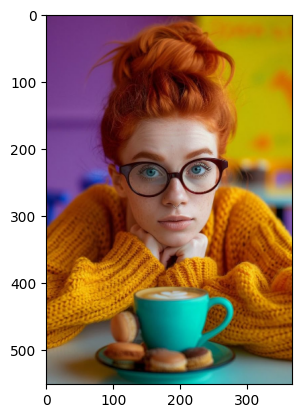

In [19]:
muestreo_factor_2 = imagen_rgb[::2, ::2]  # Por ejemplo, cada 2 filas y columnas
plt.imshow(muestreo_factor_2)

### Muestreo Factor 4

Esto significa que vamos a tomar columna un pixel si, tres no, uno si , tres no
Lo mismo con las filas: uno si, tres no, uno si, tres no

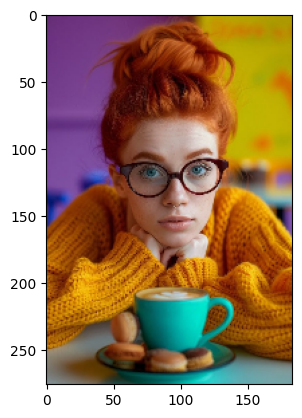

In [20]:
muestreo_factor_4 = imagen_rgb[::4, ::4]  # Por ejemplo, cada 4 filas y columnas
plt.imshow(muestreo_factor_4)

### Muestreo Factor 8

Esto significa que vamos a tomar columna un pixel si, site no, uno si , siete no
Lo mismo con las filas: uno si, siete no, uno si, siete no

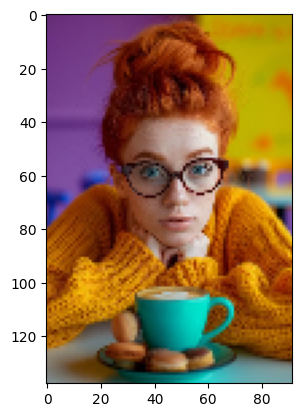

In [21]:
muestreo_factor_8 = imagen_rgb[::8, ::8]  # Por ejemplo, cada 2 filas y columnas
plt.imshow(muestreo_factor_8)

b.1) Para cada caso, calcular: El nuevo tamaño de la imagen

### Conteo de pixeles por imagen

IMPORTANTE: las imágenes en la pantalla se ven del mismo tamaño pero no lo son.
A medida que se aumentas el factor, la imagen tiene menos pixeles, esto se puede observar en los ejes. 
Lo que estuvimos haciendo es tomando y descartando pixeles de la imagen, cuando decíamos SI era el pixel que se iba guardando, cuando decíamos NO eran los pixeles que estábamos descartando.

In [22]:
print("Original: "+str(imagen_rgb.shape))
print("Factor 2: "+str(muestreo_factor_2.shape))
print("Factor 4: "+str(muestreo_factor_4.shape))
print("Factor 8: "+str(muestreo_factor_8.shape))

Original: (1104, 736, 3)
Factor 2: (552, 368, 3)
Factor 4: (276, 184, 3)
Factor 8: (138, 92, 3)


b.2) Para cada caso, calcular: El porcentaje de reducción de datos

### Cálculo del porcentaje de reducción

In [23]:
alto_original=imagen_rgb.shape[0]
ancho_original=imagen_rgb.shape[1]
original = alto_original * ancho_original

### Para el Factor 2

In [24]:
#hace la cuenta
alto_factor2=muestreo_factor_2.shape[0]
ancho_factor2=muestreo_factor_2.shape[1]
factor2=alto_factor2*ancho_factor2

diferencia_original_factor2=original-factor2

#regla de tres para calcular: si original es el 100%, cuanto es factor2?
reduccion_factor2=diferencia_original_factor2*100/original

#imprimo resultado
print("La reduccion en factor 2 es del "+str(reduccion_factor2)+"%")

La reduccion en factor 2 es del 75.0%


### Para el Factor 4

In [25]:
#hace la cuenta
alto_factor4=muestreo_factor_4.shape[0]
ancho_factor4=muestreo_factor_4.shape[1]
factor4=alto_factor4 * ancho_factor4

diferencia_original_factor4=original-factor4

#regla de tres para calcular: si original es el 100%, cuanto es factor2?
reduccion_factor4 = diferencia_original_factor4 * 100 / original

#imprimo resultado
print("La reduccion en factor 4 es del "+str(reduccion_factor4)+"%")

La reduccion en factor 4 es del 93.75%


### Para el Factor 8

In [26]:
#hace la cuenta
alto_factor8=muestreo_factor_8.shape[0]
ancho_factor8=muestreo_factor_8.shape[1]
factor8=alto_factor8*ancho_factor8

diferencia_original_factor8=original - factor8

#regla de tres para calcular: si original es el 100%, cuanto es factor8?
reduccion_factor8=diferencia_original_factor8 * 100 / original

#imprimo resultado
print("La reduccion en factor 8 es del "+str(reduccion_factor8)+"%")

La reduccion en factor 8 es del 98.4375%


d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

### ¿Qué es Cuantización?

Es el proceso mediante el cual disminuimos la cantidad de colores de una imagen.

Depende el "nivel de cuantizacion", van a ser los tonos totales
Por ejemplo, si tengo una imagen escala de grises que tiene 256 tonos, y le aplico q =128:

256 / 128 = 2

La imagen solo va a permitir 2 tonos.

Con q = 64:

256 / 64 = 4

La imagen va a permitir solo 4 tonos.

IMPORTANTE!! Que q = 64  -->   NO SIGNIFICA QUE LA IMAGEN TENGA 64 TONOS

Como se logra esto de disminuir la cantidad de colores? como decide que color va a tener cada pixel?

Dijimos que la cuantizacion cambia los colores de cada pixel.

Una imagen normal en escala de grises tiene 256 niveles (0 a 255).

Si usamos cuantización con:

q = 32  → se permiten 8 niveles: 0, 32, 64, 96, 128, 160, 192, 224
q = 64  → se permiten 4 niveles: 0, 64, 128, 192
q = 128 → se permiten 2 niveles: 0, 128
q = 256 → se permite solo 1 nivel: 0 (todo se ve negro)

Lo que vamos a hacer es tomar el pixel, ver entre que numero y numero esta
y acercarlo al mas cercano para abajo

EJEMPLO:

q = 64  → se permiten 4 niveles (o 4 tonos de gris): 0, 64, 128, 192

Si nuestro pixel es 30, esta entre 0 y 64.
como sabemos si elije 0 o 64?
Porque en cuantización siempre redondea para abajo.
Entonces en este caso, el pixel va a tomar el valor 0.

Fórmula de Cuantización

$$
\text{Valor cuantizado} = \left\lfloor \frac{\text{valor original}}{q} \right\rfloor \times q
$$


====================================
Pensando en un solo pixel DE UNA IMAGEN EN ESCALA DE GRISES...

VALOR ORIGINAL DEL PIXEL: 30
NIVEL DE CUANTIZACION q = 64
CANTIDAD DE TONOS DE GRIS QUE VA A TENER LA IMAGEN: 256 / 64 = 4

np.floor(30 / 64) * 64 = 0

El pixel va a tomar el valor: 0
=====================================

Ahora hacemos una formula para que recorra todos los pixeles de la imagen
Y tambien los 3 canales (RGB)

### Cuantización por niveles [32, 64, 128, 256] 

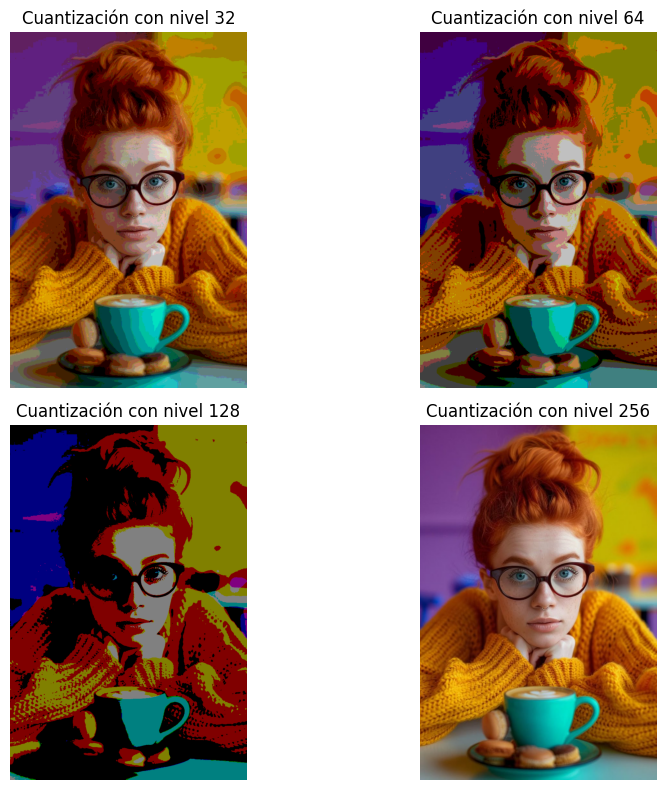

In [27]:
# Definimos los niveles de cuantización que queremos probar
niveles = [32, 64, 128, 256]

# Preparamos una figura para mostrar las 4 imágenes cuantizadas
plt.figure(figsize=(10, 8))

# Iteramos sobre cada nivel de cuantización
for i, q in enumerate(niveles):

    # Verificamos si el nivel es 256, en ese caso no aplicamos ninguna transformación
    if q == 256:
        imagen_cuantizada = imagen_rgb.copy()  # No se modifica, ya está en su máxima calidad
    else:
        # Aplicamos la cuantización
        # Paso 1: Dividimos cada valor de píxel por el nivel (q)
        # Paso 2: Redondeamos hacia abajo con floor()
        # Paso 3: Multiplicamos de nuevo por q para obtener el valor cuantizado
        imagen_cuantizada = np.floor(imagen_rgb / q) * q

    # Convertimos los valores a enteros de 8 bits (valores entre 0 y 255)
    imagen_cuantizada = imagen_cuantizada.astype(np.uint8)

    # Mostramos la imagen en una de las posiciones del gráfico (subplots)
    plt.subplot(2, 2, i+1)                         # 2 filas, 2 columnas, posición i+1
    plt.imshow(imagen_cuantizada)                 # Mostramos la imagen cuantizada
    plt.title(f'Cuantización con nivel {q}')      # Título con el nivel
    plt.axis('off')                               # Ocultamos los ejes para que se vea más limpio

# Ajustamos el espacio entre imágenes y mostramos todo
plt.tight_layout()
plt.show()


´No se ve en la formula que recorra los 3 canales? que paso?
Investigando...

Respuesta:

imagen_rgb es una matriz
si fuera una matriz de 4 pixeles, se podria ver con numpy asi:

imagen 2x2 con valores RGB:

imagen_rgb = np.array([
    [[255,   0,   0], [  0, 255,   0]],  # Fila 0: rojo puro y verde puro
    [[  0,   0, 255], [255, 255,   0]]   # Fila 1: azul puro y amarillo (rojo + verde)
], dtype=np.uint8)

si yo divido: imagen_rgb dividido qué?

a CADA UNO de los componentes de la matriz lo va a dividir por que Numpy no tiene problea en dividir o multiplicar una matriz multidimensional por un numero. Es decir, no es necesario que especifique canal por canal

En el nivel 32 yA se alcanza a ver degradacion de la imagen

Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

##a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.

### Carga la imagen

In [28]:
#cargamos la imagen
!wget  https://i.pinimg.com/736x/17/06/90/1706905258037ebb82412906c499c714.jpg


--2025-04-18 20:40:29--  https://i.pinimg.com/736x/17/06/90/1706905258037ebb82412906c499c714.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.64.84, 151.101.0.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.64.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83011 (81K) [image/jpeg]
Saving to: ‘1706905258037ebb82412906c499c714.jpg.4’

1706905258037ebb824 100%[===================>]  81.07K  --.-KB/s    in 0.003s  

2025-04-18 20:40:30 (25.1 MB/s) - ‘1706905258037ebb82412906c499c714.jpg.4’ saved [83011/83011]



### Verificación de extensión de la imagen y de la modalidad de color

In [29]:
#vemos en que espacio de color esta
from PIL import Image

img2 = Image.open("taza.jpg")
print("Formato de archivo original:", img2.format)  # Ej: 'JPEG'
print("Modo de color:", img2.mode)         # Ej: 'RGB'

Formato de archivo original: JPEG
Modo de color: RGB


### Lectura de imagen en RGB con OpenCV y muestra con Matplotlib

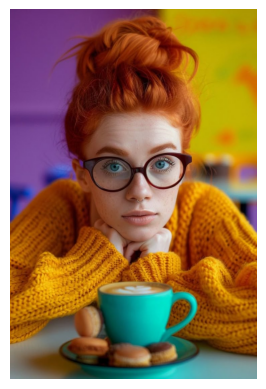

In [30]:
#con OpenCV leemos y visualizamos la imagen
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread('taza.jpg')

# Convertimos de BGR a RGB para visualizar correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostramos la imagen
plt.imshow(imagen_rgb)
plt.axis('off')  # Para ocultar los ejes
plt.show()

### Segmentación de Objeto

Elección del objeto a segmentar: taza

Elección del pixel: (950;400) pixel claro

Elección del pixel: (950;350) pixel oscuro

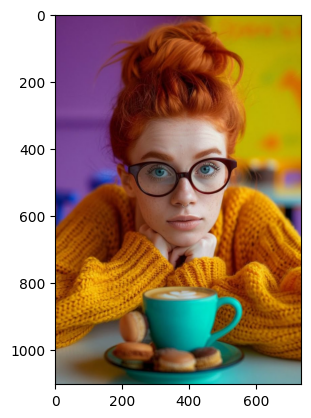

In [31]:
#convierto a rgb
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

#visualizo la imagen en matplotlib
plt.imshow(imagen_rgb)

### Elección del pixel claro

In [32]:
pixel_taza = imagen_rgb[950,400]  #elijo el pixel de la fila 950 columna 400

print(pixel_taza) # miro los tonos RGB de ese pixel 

rojo_del_pixel_taza=print("Rojo: "+str(pixel_taza[0]))
verde_del_pixel_taza=print("Verde: "+str(pixel_taza[1]))
azul_del_pixel_taza=print("Azul: "+str(pixel_taza[2]))

[  1 176 169]
Rojo: 1
Verde: 176
Azul: 169


### Muestra el color del pixel claro

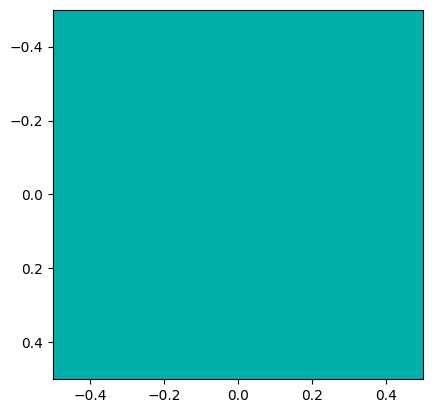

In [33]:
ver_pixel_taza = np.array([[pixel_taza]], dtype=np.uint8) #convierto a array para poder graficarlo con matplotlib
plt.imshow(ver_pixel_taza) #veo el pixel elegido

### Elección del pixel oscuro

In [34]:
pixel_taza2 = imagen_rgb[950,350]  #elijo el pixel de la fila 950 columna 350

print(pixel_taza2) # miro los tonos RGB de ese pixel 

rojo_del_pixel_taza=print("Rojo: "+str(pixel_taza2[0]))
verde_del_pixel_taza=print("Verde: "+str(pixel_taza2[1]))
azul_del_pixel_taza=print("Azul: "+str(pixel_taza2[2]))

[  3 112 115]
Rojo: 3
Verde: 112
Azul: 115


### Muestra el color del pixel oscuro

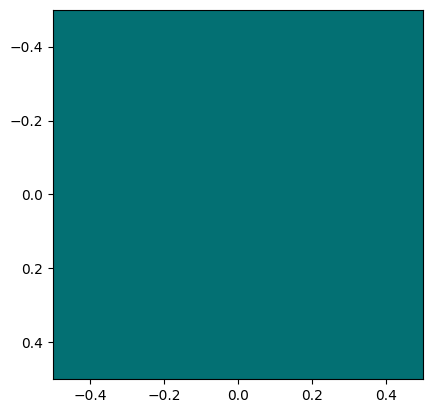

In [35]:
ver_pixel_taza = np.array([[pixel_taza2]], dtype=np.uint8) #convierto a array para poder graficarlo con matplotlib
plt.imshow(ver_pixel_taza) #veo el pixel elegido2

Obviamente si pongo que me aisle solo este color no tiene sentido, ya que la imagen tiene varios colores diferentes en la flor
Por eso elegimos un rango

Definimos rangos para detectar colores alrededor del amarillo del pixel
Mis valores:
Rojo: 238
Verde: 208
Azul: 22

IMPORTANTE 1!!!
cuando quiero extraer el numero que representa, por ej, el rojo de un pixel, el numero esta en formato
uint8
debemos convertirlo a INT para evitar errores

IMPORTANTE 2!!!
el maximo y el minimo nunca pueden ser negativos, tienen que mantenerse dentro del rango 0 a 255
por eso usando np.clip logro que se mantenga ahi

### Definición de rangos para obtener los tonos parecidos al pixel seleccionado

In [36]:
x = 32 #le pongo esta variable ajustable asi puedo jugar con los rangos

rojo_del_pixel_taza = int(pixel_taza[0])
verde_del_pixel_taza = int(pixel_taza[1])
azul_del_pixel_taza = int(pixel_taza[2])

r_min, r_max = np.clip(rojo_del_pixel_taza - x, 0, 255), np.clip(rojo_del_pixel_taza + x, 0, 255)
g_min, g_max = np.clip(verde_del_pixel_taza - x, 0,255), np.clip(verde_del_pixel_taza + x, 0, 255)
b_min, b_max = np.clip(azul_del_pixel_taza - x, 0, 255), np.clip(azul_del_pixel_taza + x, 0, 255)

print("Rangos definidos a partir del color de la taza/ del píxel y el valor x =", x)
print(f"Rojo:   entre {r_min} y {r_max}")
print(f"Verde:  entre {g_min} y {g_max}")
print(f"Azul:   entre {b_min} y {b_max}")

Rangos definidos a partir del color de la taza/ del píxel y el valor x = 32
Rojo:   entre 0 y 33
Verde:  entre 144 y 208
Azul:   entre 137 y 201


Ahora voy a trabajar con todos los pixeles que cumplan esas tres condiciones o sea que se manejen dentro de ese rango
Serian los tonos parecidos a los del pixel seleccionado

### Trabajar con los pixeles que cumplen la condición

In [37]:
def calcular_rango_rgb(pixel, x=32):
    r = int(pixel[0])
    g = int(pixel[1])
    b = int(pixel[2])

    r_min, r_max = np.clip(r - x, 0, 255), np.clip(r + x, 0, 255)
    g_min, g_max = np.clip(g - x, 0, 255), np.clip(g + x, 0, 255)
    b_min, b_max = np.clip(b - x, 0, 255), np.clip(b + x, 0, 255)

    print(f"Rangos para x = {x}")
    print(f"Rojo:   {r_min} - {r_max}")
    print(f"Verde:  {g_min} - {g_max}")
    print(f"Azul:   {b_min} - {b_max}")

    return r_min, r_max, g_min, g_max, b_min, b_max


### Definición de rangos

In [38]:
r_min, r_max, g_min, g_max, b_min, b_max = calcular_rango_rgb(pixel_taza, x=32)


Rangos para x = 32
Rojo:   0 - 33
Verde:  144 - 208
Azul:   137 - 201


### Enmascarar los pixeles que cumplen la condición

Se crea una imagen de la siguiente manera:
Todos los pixeles que cumplan con estar dentro del rango que definido, se pintan de blanco
Todo lo que no cumple, se pinta de negro

In [39]:
# Separamos los canales
R = imagen_rgb[:, :, 0]
G = imagen_rgb[:, :, 1]
B = imagen_rgb[:, :, 2]

# Creamos una máscara donde se cumplan las tres condiciones a la vez
mascara = (R >= r_min) & (R <= r_max) & \
          (G >= g_min) & (G <= g_max) & \
          (B >= b_min) & (B <= b_max)

# Convertimos la máscara a uint8 para mostrarla
mascara_binaria = np.uint8(mascara) * 255  # 1 → 255 (blanco), 0 → 0 (negro)

### Conversión y Clipping

In [40]:
# Convertimos ambos a int
pixel1 = np.array([int(c) for c in pixel_taza])
pixel2 = np.array([int(c) for c in pixel_taza2])

# Obtenemos el mínimo y máximo de cada canal
min_rgb = np.minimum(pixel1, pixel2) - x
max_rgb = np.maximum(pixel1, pixel2) + x

# Clipping para evitar negativos o pasar 255
min_rgb = np.clip(min_rgb, 0, 255)
max_rgb = np.clip(max_rgb, 0, 255)

r_min, g_min, b_min = min_rgb
r_max, g_max, b_max = max_rgb


### Máscara

In [41]:
mascara = (R >= r_min) & (R <= r_max) & \
          (G >= g_min) & (G <= g_max) & \
          (B >= b_min) & (B <= b_max)


### Visualización de la imagen

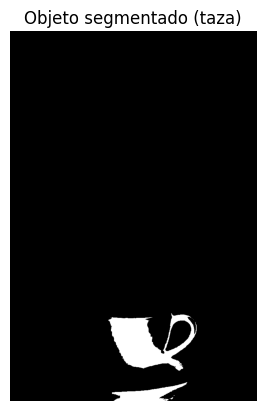

In [42]:
#imprimo la imagen binaria creada
plt.imshow(mascara, cmap='gray')
plt.title("Objeto segmentado (taza)")
plt.axis('off')
plt.show()


### Visualización del rango

In [43]:
print("Rangos definidos a partir del color amarillo del píxel y el valor x =", x)
print(f"Rojo:   entre {r_min} y {r_max}")
print(f"Verde:  entre {g_min} y {g_max}")
print(f"Azul:   entre {b_min} y {b_max}")

Rangos definidos a partir del color amarillo del píxel y el valor x = 32
Rojo:   entre 0 y 35
Verde:  entre 80 y 208
Azul:   entre 83 y 201


### Tono máximo permitido

In [44]:
g_max = 255

### Máscara e impresión

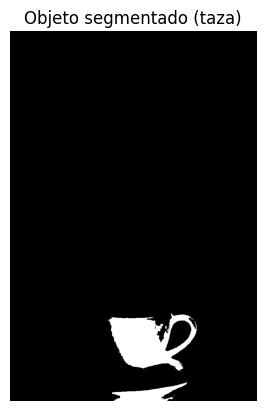

In [45]:
# Separamos los canales
R = imagen_rgb[:, :, 0]
G = imagen_rgb[:, :, 1]
B = imagen_rgb[:, :, 2]

# Creamos una máscara donde se cumplan las tres condiciones a la vez
mascara = (R >= r_min) & (R <= r_max) & \
          (G >= g_min) & (G <= g_max) & \
          (B >= b_min) & (B <= b_max)

# Convertimos la máscara a uint8 para mostrarla
mascara_binaria = np.uint8(mascara) * 255  # 1 → 255 (blanco), 0 → 0 (negro)

#imprimo la imagen binaria creada
plt.imshow(mascara_binaria, cmap='gray')
plt.title("Objeto segmentado (taza)")
plt.axis('off')
plt.show()


##b) Calcular y mostrar el histograma de la imagen en escala de grises.

### 

### Conversión de imagen a RGB y visualización en escala de grises

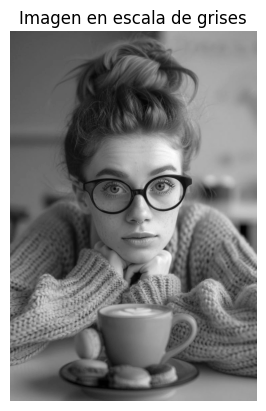

In [46]:
# La función plt_imshow no existe, debemos usar plt.imshow directamente
import cv2
import matplotlib.pyplot as plt

# Convertimos la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Convertimos a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

# Mostramos la imagen en escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()

### Visualización del histograma

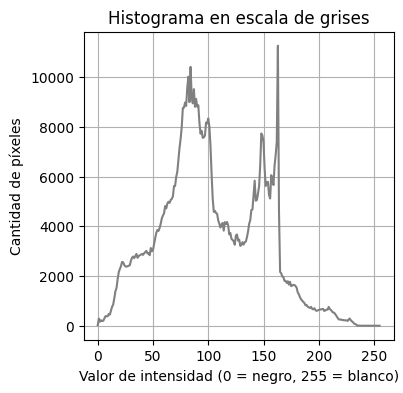

In [47]:
# Para graficar el histograma uso Matplotlib
# Calcular el histograma con OpenCV usando la imagen en escala de grises que ya tenemos (imagen_gris)
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

# Mostrar el histograma con matplotlib
plt.figure(figsize=(4, 4))
plt.plot(histograma, color='gray')
plt.title('Histograma en escala de grises')
plt.xlabel('Valor de intensidad (0 = negro, 255 = blanco)')
plt.ylabel('Cantidad de píxeles')
plt.grid(True)
plt.show()

##c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.

### Crear un rectángulo en el objeto seleccionado: taza

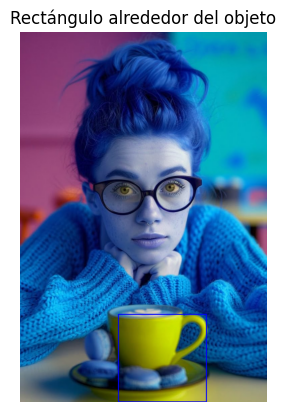

In [48]:
# Recorrer la imagen para encontrar las filas y columnas donde hay píxeles blancos (valor 255)
filas, columnas = np.where(mascara_binaria == 255)

# Obtener los límites del objeto
fila_min = np.min(filas)
fila_max = np.max(filas)
col_min = np.min(columnas)
col_max = np.max(columnas)

# Dibujar el rectángulo sobre una copia de la imagen original
imagen_con_rectangulo = imagen_rgb.copy()
cv2.rectangle(imagen_con_rectangulo, (col_min, fila_min), (col_max, fila_max), color=(255, 0, 0), thickness=2)

# Mostrar la imagen con matplotlib (recordá que OpenCV usa BGR, así que convertimos)
plt.imshow(cv2.cvtColor(imagen_con_rectangulo, cv2.COLOR_BGR2RGB))
plt.title("Rectángulo alrededor del objeto")
plt.axis('off')
plt.show()

### Visualización de imagen binaria 

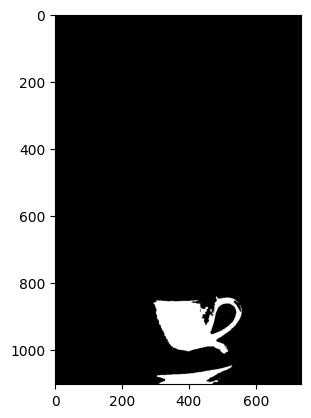

In [49]:
#imprimo la imagen binaria creada
plt.imshow(mascara_binaria, cmap='gray')

Para limpiar la imagen voy a usar la libreria OpenCV

La funcion MORPH OPEN y MORPH CLOSE

Su matriz es asi:
[1 1 1]
[1 1 1]
[1 1 1]

=======

Como funciona MORPH OPEN?

Elimina puntos blancos aislados

Tenemos una imagen que solo tiene ceros y unos.
Morph Open recorre la imagen en pedazos de 3x3
En ese pedazo de 3x3 mira el pixel del centro, y los de alrededor del centro

-Si los pixeles de ese 3x3 son todos blancos, y el del centro en blanco, lo deja asi
-Si los pixeles de alrededor hay uno o mas negros, cambia el centro a negro

Resumen: vuelve negros a todos los pixeles blancos sueltos

========

Como funciona MORPH CLOSE?

Elimina huecos en la región blanca

Tenemos una imagen que solo tiene ceros y unos.
Morph Close recorre la imagen en pedazos de 3x3
En ese pedazo de 3x3 mira el pixel del centro, y los de alrededor del centro

-Si al menos uno de los pixeles de ese 3x3 incluido el centro, es blanco, entonces cambia el centro a blanco (si ya era blanco, lo deja asi)
-Si todos los pixeles del bloque incluido el centro, son negros, el del centro se queda negro

Resumen: vuelve blancos a todos los pixeles negros que estan rodeados de blanco

### Nueva máscara de limpieza

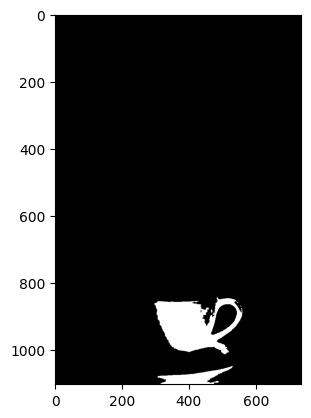

In [50]:
# Aplicar operaciones morfológicas para limpiar la máscara
kernel = np.ones((2, 2), np.uint8)

# Elimina puntos blancos sueltos
mascara_limpia = cv2.morphologyEx(mascara_binaria, cv2.MORPH_OPEN, kernel)

# Rellena huecos pequeños en la región blanca
mascara_limpia = cv2.morphologyEx(mascara_limpia, cv2.MORPH_CLOSE, kernel)
plt.imshow(mascara_limpia, cmap='gray')

##d) Dibujar los bordes del objeto segmentado en color rojo.

### Identificación de bordes del objeto

Primero detecto el borde.
Lo puedo hacer manualmente, detectando los bordes en la mascara binaria limpia, tendria que recorrer pixel por pixel y guardar cuando detecte un cambio de blanco a negro
O puedo usar librerias como OpenCV y las funciones Canny o findcountours por ejemplo

Yo voy a usar la libreria OpenCV, funciion findcontours

esta funcion tiene 3 parametros:

cv2.findContours(imagen_binaria, modo, metodo)

IMAGEN BINARIA: la imagen en blanco y negro, ya limpia
MODO: RETR_EXTERNAL (busca los contornos externos ignorando los de adentro)
METODO: CHAIN_APPROX_SIMPLE (usa menos puntos para los contornos para ahorrar memoria)

Esta funcion, una vez que encuentra un borde empieza a bordear a todos los pixeles vecinos para seguir encontrando el contorno

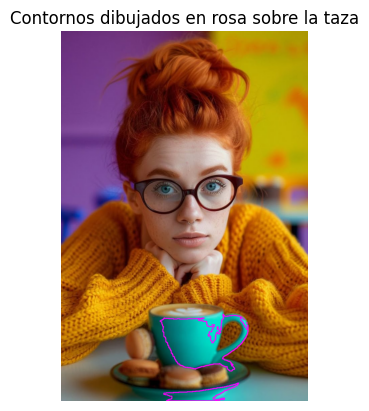

In [51]:
# Paso 1: encontrar los contornos en la máscara
contornos, _ = cv2.findContours(mascara_limpia, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Paso 2: copiar la imagen original para no modificarla
imagen_rgb_con_bordes = imagen_rgb.copy()  # Asegurate de que esté en RGB

# Paso 3: dibujar los contornos sobre la imagen
cv2.drawContours(imagen_rgb_con_bordes, contornos, -1, color=(255, 0, 255), thickness=2)  # rosa
# Paso 4: mostrar la imagen con bordes
plt.imshow(imagen_rgb_con_bordes)
plt.title("Contornos dibujados en rosa sobre la taza")
plt.axis('off')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>